## **PREDICCIÓN CATEGORÍA DE AVELLANAS** 💦

## **1. Descripción de las variables a tratar:** ⚓
1. sample_id: código de muestra
2. length: largo de la muestra
3. width: ancho de la muestra
4. thickness: espesor de la muestra.
5. surface_area: area de la superficie de la muestra.
6. mass: Masa de la muestra.
7. compactness: compactibilidad de la muestra.
8. hardness: dureza de la muestra.
9. shell_top_radius: Radio superior de la concha.
10. water_content: contenido de agua.
11. carbohydrate_content: contenido de carbohidratos.
12. variety: Variedad (c_avellana, c_americana, c_cornuta)

## **2. Importación de Librerías** ⚡

In [1]:
# 1. Manipulación de los datos
import pandas as pd
import numpy as np
from scipy import stats

# Visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

# ignorar Warnings
import warnings
warnings.filterwarnings('ignore')

## **3. Importación del Dataset y análisis previo** ⚡

In [3]:
avellanas = pd.read_csv("/content/hazelnuts.txt",sep="\t",header=None)
avellanas = avellanas.transpose()
avellanas.columns = ["sample_id","length","width","thickness","surface_area","mass","compactness",
                    "hardness","shell_top_radius","water_content","carbohydrate_content","variety"]
avellanas.head()

,sample_id,length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content,variety
0,71,11.67,12.8025,8.055074738,34.65,1375.5,0.93005,19.145,4.4604,0.048667685,0.175,c_avellana
1,72,13.86,13.0995,7.349906812,38.1,1439.55,0.93401,8.78,4.7844,0.048826089,0.167,c_avellana
2,1,20.53,15.5925,9.565426582,49.89,1623.3,0.96217,5.12,5.2893,0.049521325,0.174,c_americana
3,73,14.13,12.222,7.182948645,35.43,1412.25,0.90178,13.694,4.8168,0.049594663,0.167,c_avellana
4,2,15.85,14.724,8.622661318,43.29,1512,0.96261,10.925,4.6296,0.050384315,0.173,c_americana


In [4]:
##Función para evaluar datos NAN = Not a Number
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total valores NAN: %d" % (total_na))
        print("%40s %10s  %10s %10s" % ("Nombre Columna", "Tipo Columna", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%40s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

###Revisión de datos NAN
datos_NAN(avellanas)

Dimensiones: 201 filas, 12 columnas
Total valores NAN: 0
                          Nombre Columna Tipo Columna     #Unicos Cant Valores NAN
                               sample_id     object         201          0
                                  length     object         180          0
                                   width     object         177          0
                               thickness     object         201          0
                            surface_area     object         185          0
                                    mass     object         162          0
                             compactness     object         178          0
                                hardness     object         198          0
                        shell_top_radius     object         142          0
                           water_content     object         201          0
                    carbohydrate_content     object          10          0
                                 va

In [5]:
## Cambiar tipo de datos de object a float64
avellanas['sample_id'] = avellanas['sample_id'].astype(float)

avellanas['length'] = avellanas['length'].astype(float)

avellanas['width'] = avellanas['width'].astype(float)

avellanas['thickness'] = avellanas['thickness'].astype(float)

avellanas['surface_area'] = avellanas['surface_area'].astype(float)

avellanas['mass'] = avellanas['mass'].astype(float)

avellanas['hardness'] = avellanas['hardness'].astype(float)

avellanas['shell_top_radius'] = avellanas['shell_top_radius'].astype(float)

avellanas['water_content'] = avellanas['water_content'].astype(float)

avellanas['carbohydrate_content'] = avellanas['carbohydrate_content'].astype(float)

avellanas['compactness'] = avellanas['compactness'].astype(float)


In [7]:
avellanas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sample_id             201 non-null    float64
 1   length                201 non-null    float64
 2   width                 201 non-null    float64
 3   thickness             201 non-null    float64
 4   surface_area          201 non-null    float64
 5   mass                  201 non-null    float64
 6   compactness           201 non-null    float64
 7   hardness              201 non-null    float64
 8   shell_top_radius      201 non-null    float64
 9   water_content         201 non-null    float64
 10  carbohydrate_content  201 non-null    float64
 11  variety               201 non-null    object 
dtypes: float64(11), object(1)
memory usage: 20.4+ KB


In [8]:
avellanas.head()

,sample_id,length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content,variety
0,71.0,11.67,12.8025,8.055075,34.65,1375.50,0.93005,19.145,4.4604,0.048668,0.175,c_avellana
1,72.0,13.86,13.0995,7.349907,38.10,1439.55,0.93401,8.780,4.7844,0.048826,0.167,c_avellana
2,1.0,20.53,15.5925,9.565427,49.89,1623.30,0.96217,5.120,5.2893,0.049521,0.174,c_americana
3,73.0,14.13,12.2220,7.182949,35.43,1412.25,0.90178,13.694,4.8168,0.049595,0.167,c_avellana
4,2.0,15.85,14.7240,8.622661,43.29,1512.00,0.96261,10.925,4.6296,0.050384,0.173,c_americana


In [ ]:
##Modificar por medio de un for todas las columnas - otra forma
variables = ["sample_id","length","width","thickness","surface_area","mass","compactness","hardness","shell_top_radius","water_content","carbohydrate_content"]

for column in variables:
    avellanas[column] = avellanas[column].astype(float)

In [9]:
avellanas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sample_id             201 non-null    float64
 1   length                201 non-null    float64
 2   width                 201 non-null    float64
 3   thickness             201 non-null    float64
 4   surface_area          201 non-null    float64
 5   mass                  201 non-null    float64
 6   compactness           201 non-null    float64
 7   hardness              201 non-null    float64
 8   shell_top_radius      201 non-null    float64
 9   water_content         201 non-null    float64
 10  carbohydrate_content  201 non-null    float64
 11  variety               201 non-null    object 
dtypes: float64(11), object(1)
memory usage: 20.4+ KB


In [10]:
datos_NAN(avellanas)

Dimensiones: 201 filas, 12 columnas
Total valores NAN: 0
                          Nombre Columna Tipo Columna     #Unicos Cant Valores NAN
                               sample_id    float64         201          0
                                  length    float64         180          0
                                   width    float64         177          0
                               thickness    float64         201          0
                            surface_area    float64         185          0
                                    mass    float64         162          0
                             compactness    float64         178          0
                                hardness    float64         198          0
                        shell_top_radius    float64         142          0
                           water_content    float64         201          0
                    carbohydrate_content    float64          10          0
                                 va

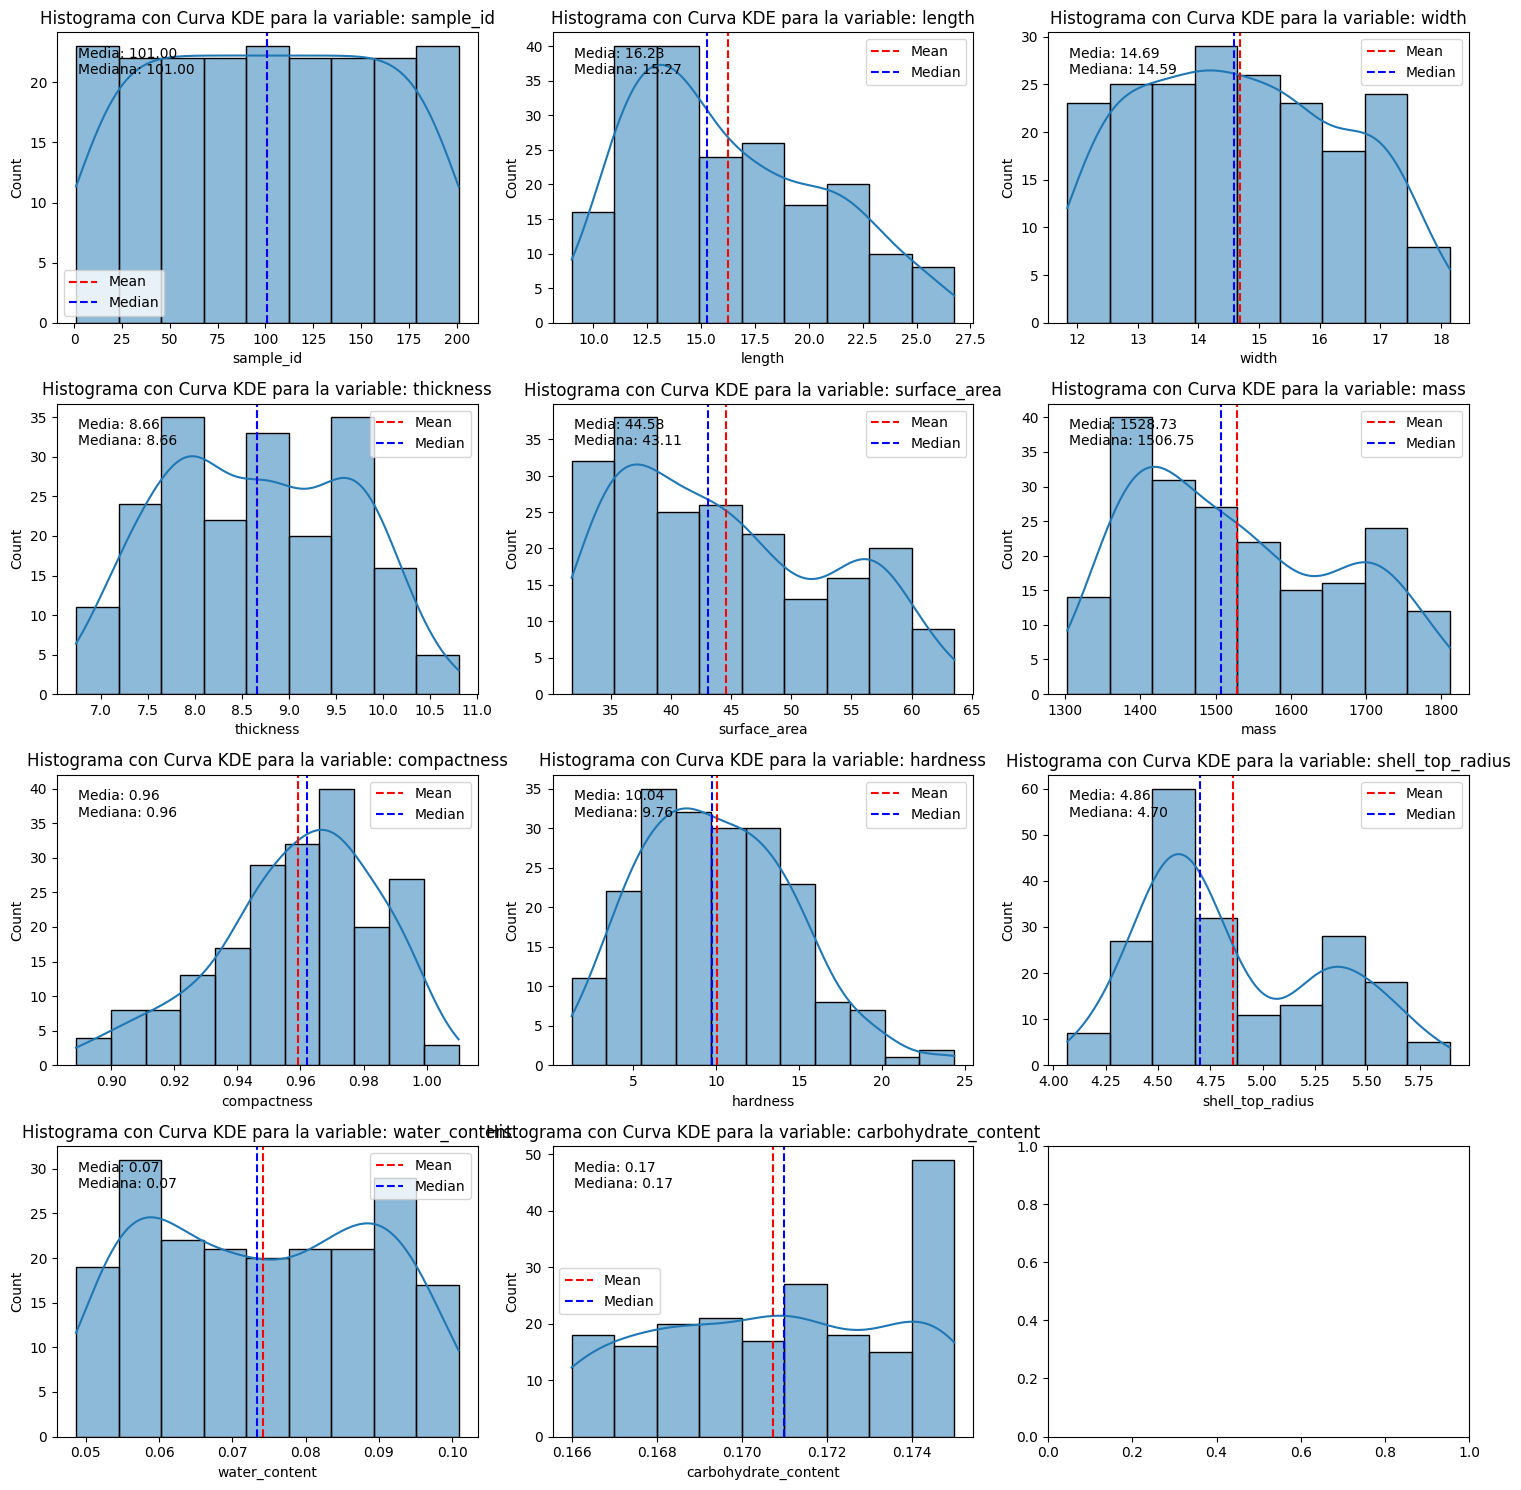

In [11]:
# Asociar Variables
variables = ["sample_id","length","width","thickness","surface_area","mass","compactness","hardness","shell_top_radius","water_content","carbohydrate_content"]

# Configurar filas y columnas para las gráficas y tamaño del espacio
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Configuración de la imagen
axes = axes.flatten()

# Ciclo para iterar sobre cada variable
for i, var in enumerate(variables):
    ax = axes[i]
    sns.histplot(avellanas[var], kde=True, ax=ax)
    ax.axvline(avellanas[var].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(avellanas[var].median(), color='blue', linestyle='--', label='Median')

    # Agregar al plot la media y mediana
    ax.annotate(f'Media: {avellanas[var].mean():.2f}\nMediana: {avellanas[var].median():.2f}',
                xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

    ax.set_title(f'Histograma con Curva KDE para la variable: {var}')
    ax.set_xlabel(var)
    ax.legend()

# Ajustar layout e imprimir
plt.tight_layout()
plt.show()

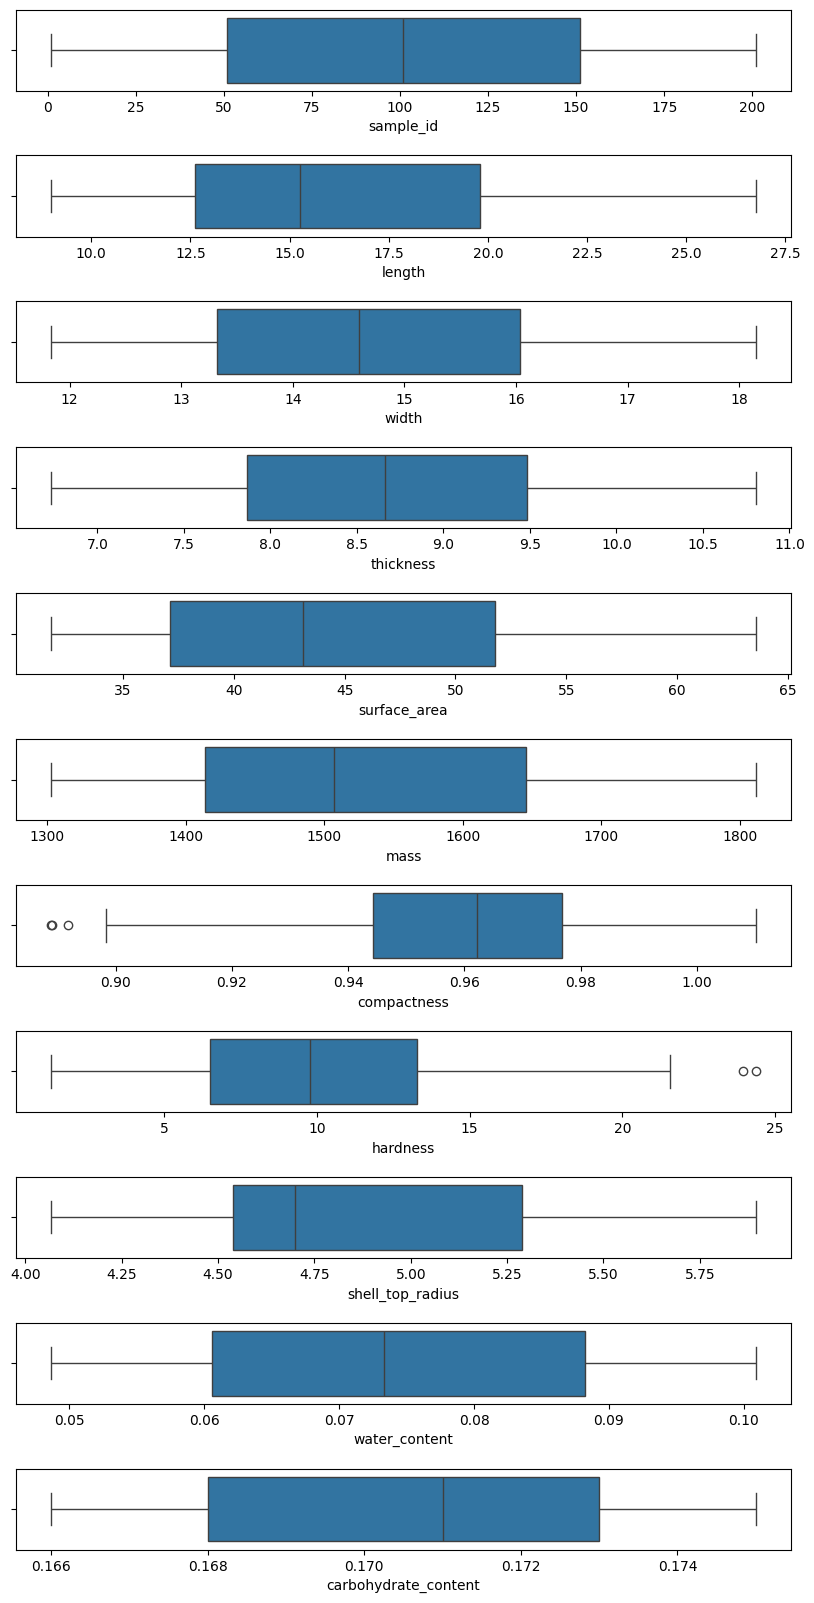

In [12]:
##Distribución de datos - diagrama de caja - ISO8000
fig, ax = plt.subplots(11, 1, figsize=(10, 20))

fig.subplots_adjust(hspace=0.80)
for i in range(11) :
    sns.boxplot(x=variables[i], data=avellanas, ax=ax[i])

In [13]:
##Distribución de variables a usar para clasificar
avellanas['variety'].value_counts()

,count
variety,
c_americana,70
c_cornuta,66
c_avellana,65


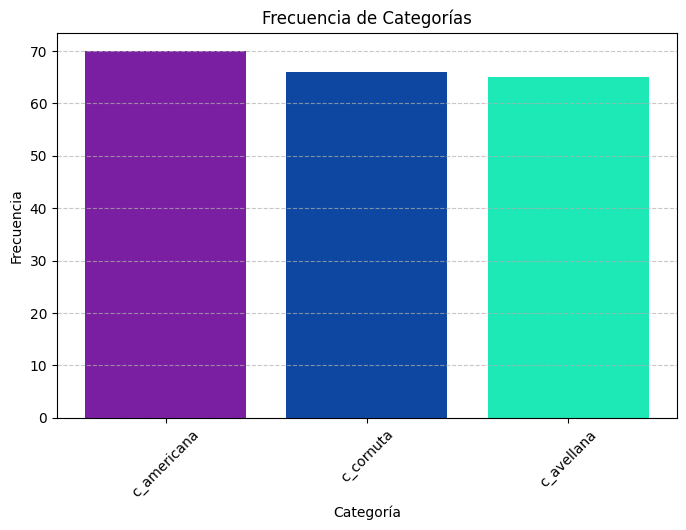

In [15]:
##grafica de la distribución de las tres categorías de la clase variedad
category_counts = avellanas['variety'].value_counts()
plt.figure(figsize=(8, 5))  # Tamaño del gráfico
plt.bar(category_counts.index, category_counts.values, color=['#7b1fa2', '#0d47a1', '#1de9b6'])
plt.title('Frecuencia de Categorías')  # Título del gráfico
plt.xlabel('Categoría')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula horizontal

# Mostrar el gráfico
plt.show()

Text(0.5, 1.0, 'Distribución de Variedad de Avellanas')

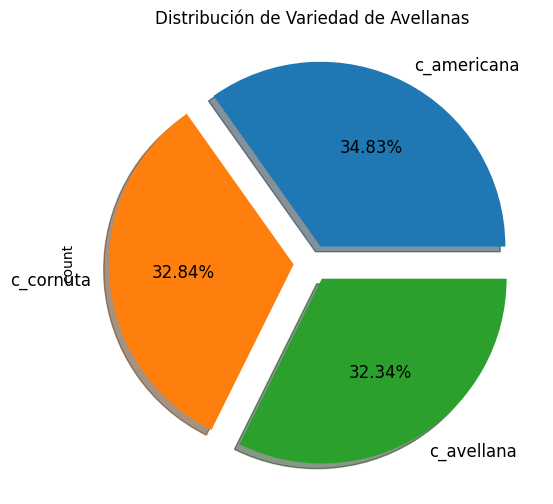

In [16]:
##Distribución de los datos en la variable de potabilidad
plt.figure(figsize=(6,6))
# Pie plot
avellanas['variety'].value_counts().plot.pie(explode=[0.1,0.1,0.1],
                    autopct='%1.2f%%', shadow=True,
                    textprops={'fontsize':12}).set_title("Distribución de Variedad de Avellanas")

In [17]:
##Partición en variables independientes y dependientes
X= avellanas.drop(['variety'], axis=1)
y= avellanas['variety']

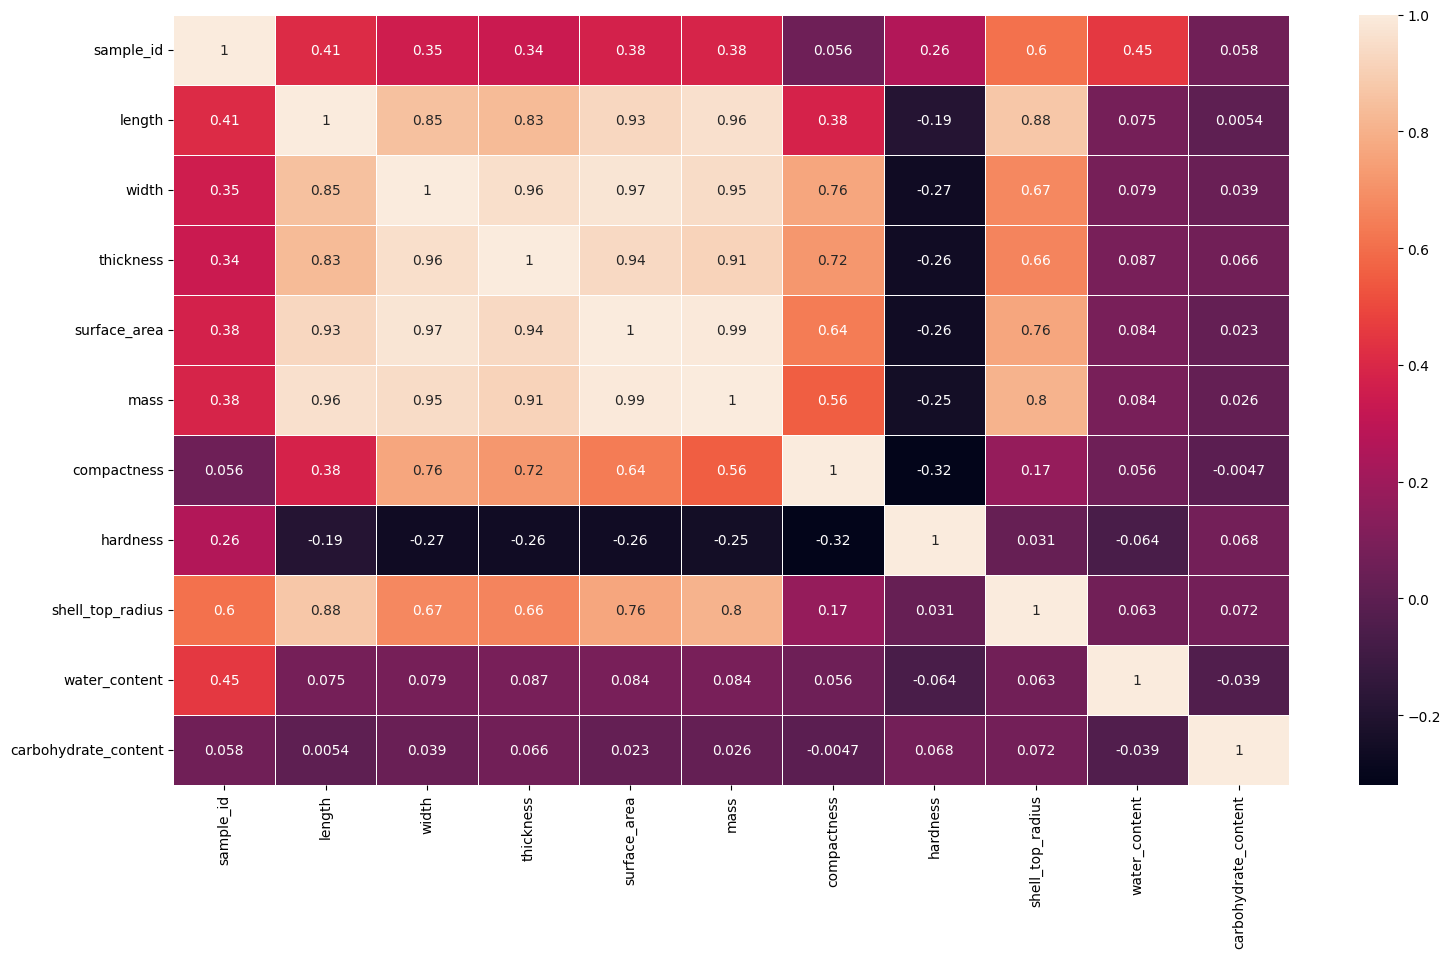

In [18]:
def DiagCorr(df, tamuno, tamdos):
    f, ax = plt.subplots(figsize=(tamuno,tamdos))
    sns.heatmap(df.corr(method="spearman"), annot=True, linewidths=.5, ax=ax)

DiagCorr(X, 18,10)

## **4. Creación del modelo sin balanceo ni caracteristicas ni hiperparámetros sin normalización** ⚡

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Crear el modelo de regresión logística
# multi_class='multinomial' es para clasificación multiclase
# solver='lbfgs' es un algoritmo adecuado para 'multinomial'
model = LogisticRegression(multi_class='multinomial',  solver='saga', max_iter=100)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)

Precisión del modelo: 0.9012345679012346
Matriz de confusión:
 [[27  0  0]
 [ 0 21  6]
 [ 0  2 25]]


<Axes: >

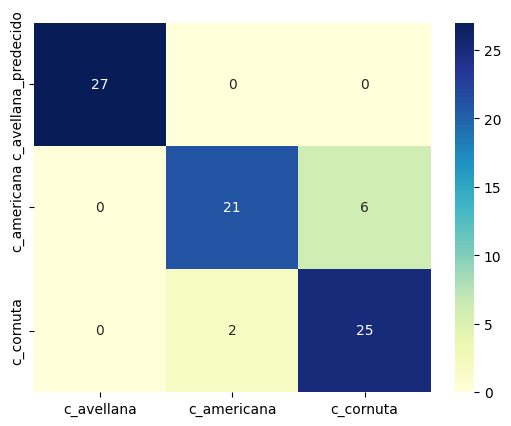

In [20]:
cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['c_avellana','c_americana', 'c_cornuta'],
                         index=['c_avellana_predecido','c_americana','c_cornuta'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [21]:
y_test.value_counts()

,count
variety,
c_avellana,27
c_americana,27
c_cornuta,27


In [22]:
categories, counts = np.unique(y_test, return_counts=True)

# Mostrar los resultados
for category, count in zip(categories, counts):
    print(f"{category}: {count}")

c_americana: 27
c_avellana: 27
c_cornuta: 27


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 c_americana       1.00      1.00      1.00        27
  c_avellana       0.91      0.78      0.84        27
   c_cornuta       0.81      0.93      0.86        27

    accuracy                           0.90        81
   macro avg       0.91      0.90      0.90        81
weighted avg       0.91      0.90      0.90        81



## **5. Creación del modelo sin balanceo ni caracteristicas con hiperparámetros sin normalización** ⚡

In [27]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],  # 'saga' es bueno para grandes datasets y soporta l1 y l2
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'max_iter': [100, 200, 500]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid, cv=10, scoring='f1_weighted', verbose=1)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de cross-validation:", grid_search.best_score_)


Fitting 10 folds for each of 60 candidates, totalling 600 fits
Mejores parámetros: {'C': 0.01, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Mejor score de cross-validation: 0.9390476190476191


In [28]:
modelDos = LogisticRegression(multi_class='multinomial',  solver='saga', max_iter=500, C=0.01, penalty='l2')

# Entrenar el modelo
modelDos.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = modelDos.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)

Precisión del modelo: 0.9506172839506173
Matriz de confusión:
 [[27  0  0]
 [ 0 26  1]
 [ 0  3 24]]


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 c_americana       0.92      1.00      0.96        24
  c_avellana       1.00      0.84      0.91        31
   c_cornuta       0.88      1.00      0.94        23

    accuracy                           0.94        78
   macro avg       0.94      0.95      0.94        78
weighted avg       0.94      0.94      0.93        78



## **6. Balanceo de Datos de las tres categorías y luego crear nuevo modelo con hiperparámetros 🥱**

In [29]:
###resample con undersampling.
from sklearn.utils import resample
# Encontrar el número mínimo de muestras entre las categorías seleccionadas
min_samples = avellanas['variety'].value_counts().min()

# Resample de cada categoría
categories = ['c_americana', 'c_avellana', 'c_cornuta']
frames = []  # Lista para guardar los dataframes resampleados

for category in categories:
    # Subconjunto de cada categoría
    category_subset = avellanas[avellanas['variety'] == category]
    # Resamplear el subconjunto
    resampled_subset = resample(category_subset,
                                replace=True,       # Muestreo con reemplazo
                                n_samples=min_samples,  # Número de muestras igual al mínimo encontrado
                                random_state=123)   # Semilla para reproducibilidad
    frames.append(resampled_subset)

# Concatenar todos los subconjuntos resampleados
avellanas_resampled = pd.concat(frames)

In [30]:
avellanas_resampled['variety'].value_counts()

,count
variety,
c_americana,65
c_avellana,65
c_cornuta,65


In [31]:
X = avellanas_resampled.drop(['variety'], axis=1)

y = avellanas_resampled['variety']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Crear el modelo de regresión logística
# multi_class='multinomial' es para clasificación multiclase
# solver='lbfgs' es un algoritmo adecuado para 'multinomial'
model = LogisticRegression(multi_class='multinomial',  solver='saga', max_iter=500, C=0.01, penalty='l2')

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)

Precisión del modelo: 0.9358974358974359
Matriz de confusión:
 [[24  0  0]
 [ 2 26  3]
 [ 0  0 23]]


1. Data normal - Tiramos el modelo clasificación / 60% - 40% - 70% 30% - 80% 20%
2. Data normal - hiperparámetros Tiramos el modelo clasificación / 60% - 40% - 70% 30% - 80% 20%
**3. Data normal - hiperparámetros, balanceo Tiramos el modelo clasificación / 60% - 40% - 70% 30% - 80% 20%**
4. Data normalizada - hiperparámetros, balanceo Tiramos el modelo clasificación / 60% - 40% - 70% 30% - 80% 20%
5. Data normalizada - hiperparámetros, balanceo, mejores características Tiramos el modelo clasificación / 60% - 40% - 70% 30% - 80% 20%

## **7. Balanceo de datos, hiperparámetros y normalización**

In [33]:
from sklearn.preprocessing import MinMaxScaler
def normaData(df):
    valores = df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

XNorm = normaData(X)

XNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
sample_id,195.0,0.505154,0.291448,0.0,0.262626,0.510101,0.742424,1.0
length,195.0,0.433971,0.245653,0.0,0.217342,0.386261,0.615991,1.0
width,195.0,0.454725,0.282155,0.0,0.215549,0.429624,0.705232,1.0
thickness,195.0,0.472615,0.250136,0.0,0.278068,0.465551,0.692401,1.0
surface_area,195.0,0.436283,0.284271,0.0,0.172447,0.378613,0.712428,1.0
mass,195.0,0.469941,0.270220,0.0,0.224174,0.440083,0.719008,1.0
compactness,195.0,0.594240,0.218270,0.0,0.457090,0.609142,0.755597,1.0
hardness,195.0,0.389942,0.194339,0.0,0.242573,0.385820,0.529729,1.0
shell_top_radius,195.0,0.453143,0.239061,0.0,0.259232,0.387986,0.685869,1.0
water_content,195.0,0.485754,0.302745,0.0,0.194316,0.493126,0.789176,1.0


In [38]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.50, random_state=42)

# Crear el modelo de regresión logística
# multi_class='multinomial' es para clasificación multiclase
# solver='lbfgs' es un algoritmo adecuado para 'multinomial'
model = LogisticRegression(multi_class='multinomial',  solver='saga', max_iter=500, C=0.01, penalty='l2')

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)

Precisión del modelo: 0.8775510204081632
Matriz de confusión:
 [[23  1  9]
 [ 0 32  2]
 [ 0  0 31]]


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 c_americana       1.00      0.70      0.82        33
  c_avellana       0.97      0.94      0.96        34
   c_cornuta       0.74      1.00      0.85        31

    accuracy                           0.88        98
   macro avg       0.90      0.88      0.88        98
weighted avg       0.91      0.88      0.88        98



In [ ]:
avellanas.to_csv("avellanas.csv", index=False)